In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import astropy
from astropy.io import fits
from astropy.stats import sigma_clip
from numpy.random import randn
from numpy import mean
from numpy import ma
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reject_outliers(data, m=2):
    #print(data)
    #print(' ')
    stdev = np.nanstd(data)
    mean = np.nanmean(data)
    median = np.nanmedian(data)
    Min = median - stdev * m
    Max = median + stdev * m
    #print(Min, Max)
    for p, point in enumerate(data):
        if point < Min: data[p]=np.nan
        if point > Max: data[p]=np.nan
    #print(data)
    #print(' ')
    return data

# Data Framer

In [3]:
filters = ['vv','bb','uu','w1','m2','w2']
fields = ['WD1121']
fields=['SN2005am','SN2005cf','SN2006X','SN2006aj','SN2006jc','SN2007cv','SN2007on','SN2007pk','SN2009ig','SN2010al','SN2011by','SN2011hw','SN2011iw','SN2012fr','LSQ13cuw','SN2016gxp','SN2018aoz','SN2018xx','SN2018cow','SN2018hna','SN2019hgp','SN2019np','SN2019wep','SN2019yvq','SN2020hvf','SN2021csp','SN2021yja','SN2022hrs','SN2023bee','WD1026','WD1121','WD1657','GRB221009a'] 
comps = ['1','2','3','4','5','6','7','8','9','01','02','03','04','05','06',
        '07','08','09','10','11','12','13','14','15','16','17','18','19',
        '20','21','22','23','24','25','26','27','28','29','30','31','32',
        '33','34','35']
fields=['SN2006jc']
main_file_pattern = os.path.join('compdata', '{field}_{filter}_senstest_comp{comp}_more.dat')
centroid_file_pattern = os.path.join('compdata', '{field}_{filter}_senstest_comp{comp}_centroid_more.dat')

import dataframer as dfr
df = dfr.process_photometry_data(filters, fields, comps, main_file_pattern, centroid_file_pattern)
print(df.shape)

(35423, 20)


In [4]:
dfr.filter_entries(df=df, entries=["apcor"], comparison='>', threshold=1.4, print_summary=True)

Number of entries: 48
Number of filters: 4
Number of fields: 1
Number of comps: 17
Number of epochs: 33


,epoch,year,exposure,telapse,bkg,cr3,cr3e,cr5,cr5e,apcor,apcore,cr3_centroid,cr3e_centroid,cr5_centroid,cr5e_centroid,apcor_centroid,apcore_centroid,filter,field,comp
27127,127,2007.083727,106.0700,107.7700,0.010415,44.523400,0.906390,64.729600,0.658427,1.453833,0.033086,NaN,NaN,NaN,NaN,NaN,NaN,uu,SN2006jc,3
28298,98,2007.076579,110.9890,112.7670,0.010866,1.375510,0.125220,2.038110,0.161045,1.481712,0.178613,NaN,NaN,NaN,NaN,NaN,NaN,uu,SN2006jc,7
32114,14,2006.832193,22.4236,22.7830,0.010229,13.540800,0.863250,19.106700,0.897125,1.411047,0.111722,14.737800,0.896328,19.428800,0.903602,1.318297,0.100933,uu,SN2006jc,11
33387,87,2007.038115,46.0418,46.7796,0.010494,2.827050,0.268407,4.647870,0.340989,1.644071,0.197264,42.141000,0.794675,46.734000,0.623482,1.108991,0.025617,uu,SN2006jc,15
39809,209,2007.168265,175.1540,177.9610,0.001654,6.866560,0.214624,13.359300,0.268503,1.945559,0.072298,NaN,NaN,NaN,NaN,NaN,NaN,w1,SN2006jc,1
40340,140,2007.083722,212.3680,215.7710,0.001994,4.415270,0.150090,6.667520,0.176385,1.510105,0.065047,NaN,NaN,NaN,NaN,NaN,NaN,w1,SN2006jc,3
40406,206,2007.167687,142.8820,145.1710,0.001524,1.131400,0.091437,1.614980,0.109822,1.427417,0.150765,NaN,NaN,NaN,NaN,NaN,NaN,w1,SN2006jc,3
40409,209,2007.168265,175.1540,177.9610,0.001654,2.180150,0.116092,4.708330,0.164342,2.159636,0.137504,NaN,NaN,NaN,NaN,NaN,NaN,w1,SN2006jc,3
40998,198,2007.168265,175.1540,177.9610,0.001654,4.590600,0.172413,9.639670,0.230669,2.099871,0.093514,NaN,NaN,NaN,NaN,NaN,NaN,w1,SN2006jc,5
45809,209,2007.168265,175.1540,177.9610,0.001654,3.843170,0.156001,7.732460,0.207923,2.012001,0.097965,3.920070,0.157498,7.753910,0.208195,1.978003,0.095584,w1,SN2006jc,12


vv
SN2006jc
1
     epoch         year  exposure   telapse       bkg      cr3     cr3e  \
0        0  2006.781488  145.4440  147.7750  0.026589  93.5734  1.22542   
1        1  2006.781672  142.4800  144.7630  0.037219  95.9308  1.27964   
2        2  2006.790635   78.5099   79.7680  0.018592  94.6837  1.67161   
3        3  2006.790821   83.4399   84.7770  0.019998  88.5054  1.55686   
4        4  2006.796510  131.6640  133.7740  0.024428  89.6024  1.28106   
..     ...          ...       ...       ...       ...      ...      ...   
201    201  2012.461113   75.5563   76.7671  0.049379  88.7085  1.63139   
202    202  2013.125980   57.8454   58.7724  0.013720  89.6816  1.82282   
203    203  2013.126174  124.7800  126.7790  0.014054  88.0900  1.24413   
204    204  2013.126327  112.9540  114.7640  0.013983  88.7311  1.28947   
205    205  2013.126898   99.1635  100.7530  0.013860  87.8478  1.41613   

          cr5      cr5e     apcor    apcore  cr3_centroid  cr3e_centroid  \
0    103.

KeyError: "None of [Index([0], dtype='int64')] are in the [index]"

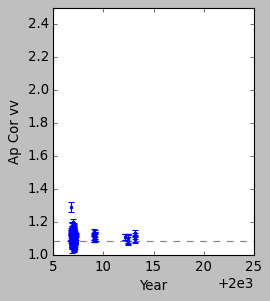

In [15]:
# These lists define the baseline aperture corrections and a color palette.
flatapcor = [1.086, 1.086, 1.10, 1.11, 1.12, 1.15]
apcorflat = [1.086, 1.086, 1.10, 1.11, 1.12, 1.15]
colors = ['#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a',
          '#00429d','#73a2c6', '#f4777f', '#93003a']

# --- Create the figure and set some plotting defaults
fig = plt.figure(figsize=(11, 8.5))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.style.use('classic')

# Loop over each filter and create one subplot per filter.
for filt in filters:
    print(filt)
    # Get the index (position) of this filter in the list.
    filt_idx = filters.index(filt)
    
    # Define the baseline (flat) aperture correction for this filter.
    baseline = apcorflat[filt_idx]
    
    # Create a subplot in a 2x3 grid.
    ax = fig.add_subplot(2, 3, filt_idx + 1)
    ax.set_xlabel('Year')
    ax.set_ylabel('Ap Cor ' + filt)
    ax.axis([2005, 2025, 1.0, 2.5])
    
    # Draw a horizontal reference line corresponding to the flat aperture correction.
    ax.plot([2005, 2025], [baseline, baseline], color='gray', linestyle='--')
    
    # Loop over each field.
    for field in fields:
        print(field)
        # For each comparison star (comp), extract the corresponding data.
        for comp_index, comp in enumerate(comps):
            print(comp)
            # Subset the DataFrame for this filter, field, and comp.
            subdf = df[(df['filter'] == filt) & (df['field'] == field) & (df['comp'] == comp)]
            if subdf.empty:
                continue  # Skip if no data for this combination.
            
            # Sort the subset by year so that points connect in order.
            subdf = subdf.sort_values(by='year')
            
            
            x = subdf['year']
            y = subdf['apcor']
            yerr = subdf['apcore']
            print(subdf)
            for entry_index, entry in enumerate(subdf['year']):
                #print(subdf.iloc['year',entry_index], subdf.iloc['apcor',entry_index], subdf.iloc['apcore',entry_index])
                print(subdf.loc[[entry_index],['year']], subdf.loc[[entry_index],['apcor']], subdf.loc[[entry_index],['apcore']] )
            # Select a color for this comp. Here we cycle through the colors list.
            # Based on whether teleapse > 1.1*expopsure time
            # Red if greater, blue if less
            #if subdf['telapse'].mean() > 1.1*subdf['exposure'].mean():
            #    color = 'red'
            #else:
            #    color = 'blue'
            # color = colors[comp_index % len(colors)]
            color = 'blue'
            
            # Plot errorbars: x=year, y=apcor with error yerr.
            ax.errorbar(x, y, yerr=yerr, marker='s', linestyle='none',
                        mfc=color, mec=color, ms=2, mew=1, color=color)
            
plt.savefig('UVOTapcor_year.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Assume that you have already built the DataFrame 'df' from your files.
# The DataFrame should have (at least) the following columns:
#   'filter', 'field', 'comp', 'epoch', 'year',
#   'cr3', 'cr3_centroid', 'cr5', 'cr5_centroid'
#
# For example, one row might look like:
#   filter: 'w1', field: 'WD1121', comp: '1', epoch: 12, year: 2010.5,
#   cr3: 123.45, cr3_centroid: 121.00, cr5: 234.56, cr5_centroid: 232.00

# Create the figure
fig = plt.figure(figsize=(11, 8.5))

# Get the unique filters from the DataFrame (the order should match your desired order)
unique_filters = df['filter'].unique()

# Loop over each filter (each subplot)
for i, filt in enumerate(unique_filters):
    print("Processing filter:", filt)
    
    # Create subplot in a 2x3 grid (adjust if you have a different number of filters)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xlabel('Year')
    ax.set_ylabel('Centroided Fraction')
    ax.axis([2005, 2025, 0.9, 1.2])
    
    # Select the rows for the current filter.
    df_filt = df[df['filter'] == filt]
    
    # Loop over each field and each comparison star in this filter.
    for field in df_filt['field'].unique():
        df_field = df_filt[df_filt['field'] == field]
        for comp in df_field['comp'].unique():
            # Select the rows for this field and comp
            df_sub = df_field[df_field['comp'] == comp].sort_values(by='year')
            
            # Calculate the centroided fraction for cr5 and for cr3.
            # (Make sure you have nonzero denominators; otherwise these values will be NaN.)
            ratio_cr5 = df_sub['cr5_centroid'] / df_sub['cr5']
            ratio_cr3 = df_sub['cr3_centroid'] / df_sub['cr3']
            
            # Plot the ratios with errorbar (here we are not plotting an error bar value, only markers)
            ax.errorbar(df_sub['year'], ratio_cr5, marker='s', linestyle='none',
                        mfc='blue', mec='blue', ms=2, mew=1, color='blue')
            ax.errorbar(df_sub['year'], ratio_cr3, marker='o', linestyle='none',
                        mfc='red', mec='red', ms=2, mew=1, color='red')

# Save and show the figure.
plt.savefig('UVOTcentroid_year.png', dpi=300, bbox_inches='tight')
plt.show()